In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [2]:
#Import IMDB dataset:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

#Pad sequences:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [11]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(input_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.5803 - loss: 0.6642 - val_accuracy: 0.7644 - val_loss: 0.4928
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.8116 - loss: 0.4216 - val_accuracy: 0.7556 - val_loss: 0.4865
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.8653 - loss: 0.3297 - val_accuracy: 0.8244 - val_loss: 0.3967
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.8942 - loss: 0.2657 - val_accuracy: 0.8308 - val_loss: 0.3878
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9312 - loss: 0.1879 - val_accuracy: 0.7702 - val_loss: 0.5227
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9554 - loss: 0.1363 - val_accuracy: 0.8038 - val_loss: 0.5011
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9750 - loss: 0.0824 - val_accuracy: 0.8530 - val_loss: 0.4726
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9840 - loss: 0.0522 -

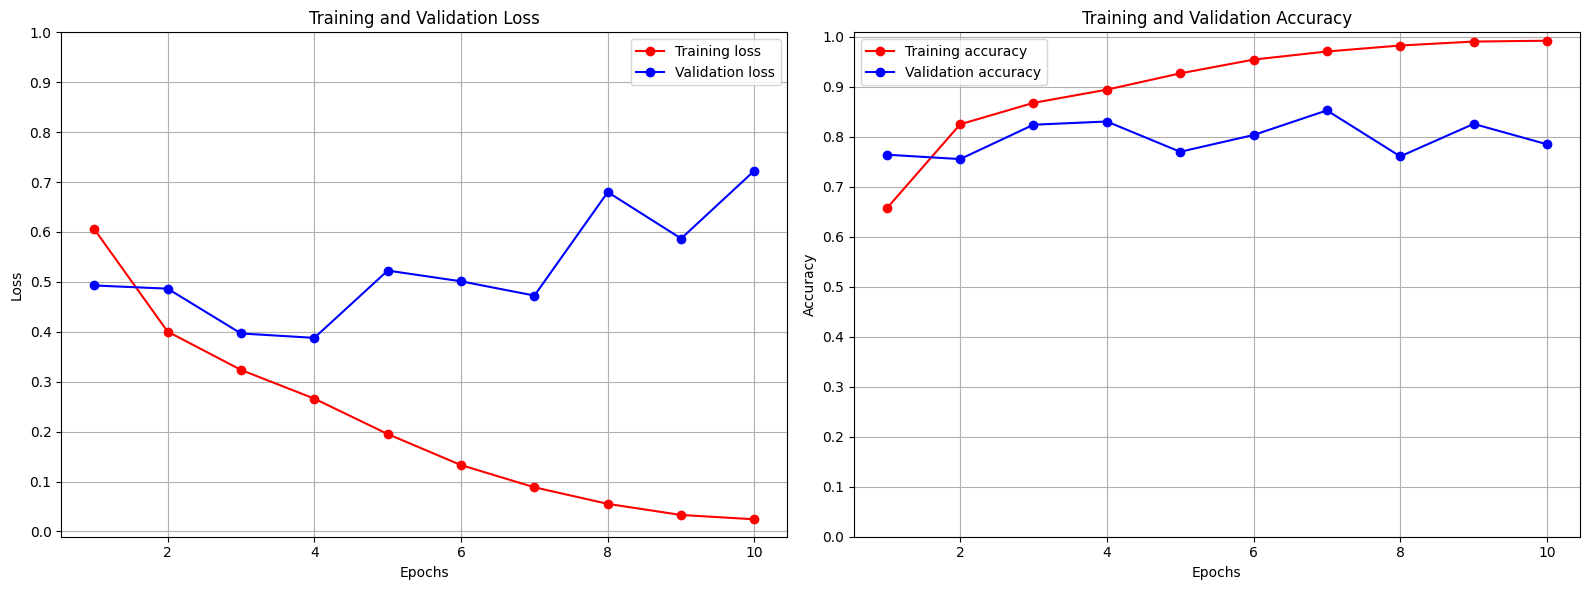

In [16]:
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(epochs, history_dict['loss'], 'r-o', label='Training loss')
ax1.plot(epochs, history_dict['val_loss'], 'b-o', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

loss_ticks = np.arange(0, 1.1, 0.1)
ax1.set_yticks(loss_ticks)

ax2.plot(epochs, history_dict['accuracy'], 'r-o', label='Training accuracy')
ax2.plot(epochs, history_dict['val_accuracy'], 'b-o', label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid(True)
ax2.legend()

accuracy_ticks = np.arange(0, 1.1, 0.1)
ax2.set_yticks(accuracy_ticks)

plt.tight_layout()
plt.show()

In [19]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss="binary_crossentropy", metrics=["accuracy"])

In [21]:
history = model.fit(input_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5773 - loss: 0.6657 - val_accuracy: 0.8082 - val_loss: 0.4405
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8213 - loss: 0.4134 - val_accuracy: 0.8168 - val_loss: 0.4072
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8611 - loss: 0.3382 - val_accuracy: 0.8682 - val_loss: 0.3234
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8781 - loss: 0.2983 - val_accuracy: 0.8594 - val_loss: 0.3285
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8915 - loss: 0.2786 - val_accuracy: 0.8704 - val_loss: 0.3135
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9042 - loss: 0.2509 - val_accuracy: 0.8828 - val_loss: 0.2970
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9103 - loss: 0.2331 - val_accuracy: 0.8534 - val_loss: 0.3544
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9206 - loss: 0.2085 - val_accu

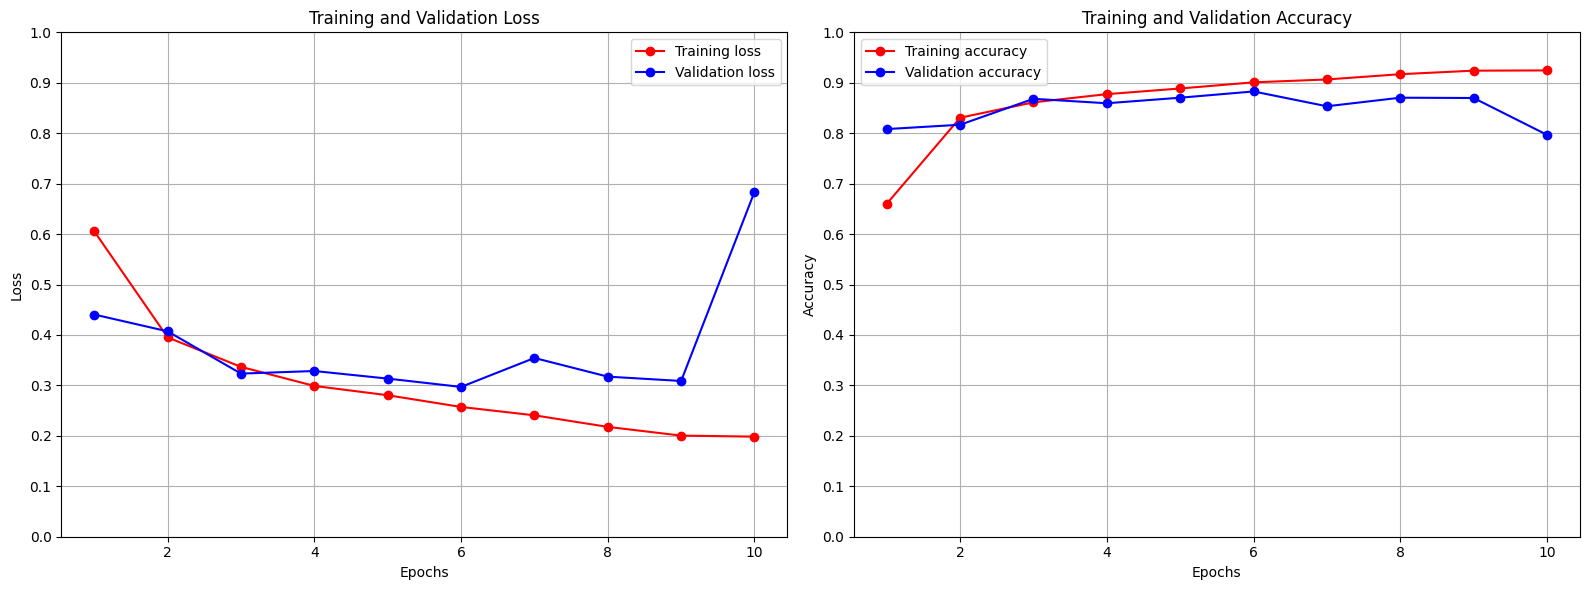

In [22]:
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(epochs, history_dict['loss'], 'r-o', label='Training loss')
ax1.plot(epochs, history_dict['val_loss'], 'b-o', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

loss_ticks = np.arange(0, 1.1, 0.1)
ax1.set_yticks(loss_ticks)

ax2.plot(epochs, history_dict['accuracy'], 'r-o', label='Training accuracy')
ax2.plot(epochs, history_dict['val_accuracy'], 'b-o', label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid(True)
ax2.legend()

accuracy_ticks = np.arange(0, 1.1, 0.1)
ax2.set_yticks(accuracy_ticks)

plt.tight_layout()
plt.show()